# Spotify Song Clustering and Playlist Automation
### The goal of this project is to use unsupervised machine learning (K-Means) to segment over 5,000 Spotify songs based on their audio features. By identifying distinct clusters, we can understand the different musical profiles within the dataset.

In [5]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [6]:
spotify_df = pd.read_csv(r"E:\wbs_data_science_bootcamp\week_07\3_spotify_5000_songs.csv")
print(spotify_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [7]:
# clean column names since they contain a space at the end
songs_df_clean = spotify_df.copy()
songs_df_clean.columns = songs_df_clean.columns.str.strip()

songs_df_clean.columns



Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [8]:
# check the values inside each column and clean the table 
# songs_df_clean.describe()

# name -> song name
# artist -> artist name
# danceability -> 0-1 how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity



# drop columns that are not needed
# songs_df_clean = songs_df_clean.drop(columns=["Unnamed: 0", "mode", "type", "duration_ms"])
print(songs_df_clean["key"].value_counts())
# print(songs_df_clean["type"].unique())


key
1     597
0     572
7     542
9     503
2     502
5     422
11    404
6     396
8     376
10    361
4     357
3     203
Name: count, dtype: int64


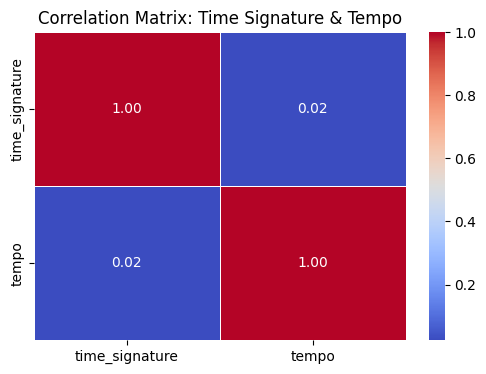

In [9]:
# make correlation between time signature and tempo columns
# Ensure your columns have numeric data types for correlation calculation
# Calculate correlation matrix for 'time signature' and 'tempo'
correlation_matrix = songs_df_clean[['time_signature', 'tempo']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Time Signature & Tempo")
plt.show()
# -> no correlation -> keep both columns

In [10]:
'''
dropping columns here:s
'''

# drop columns that are not needed
songs_df_clean_dropped_cols = songs_df_clean.drop(columns=["Unnamed: 0", "mode", "type", "type"])



In [11]:
# rest of the columns:
'''
['name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', duration_ms, 'time_signature', 'id', 'html']
'''

songs_df_clean_dropped_cols.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')

In [12]:
########### NORMALIZE HERE ############
# Create a copy of the dataframe
songs_df_clean_dropped_cols_minmax = songs_df_clean_dropped_cols.copy()

# Separate numeric and non-numeric columns
numeric_cols = songs_df_clean_dropped_cols_minmax.select_dtypes(include=['number']).columns
non_numeric_cols = songs_df_clean_dropped_cols_minmax.select_dtypes(exclude=['number']).columns

# Extract the numeric and non-numeric data
numeric_data = songs_df_clean_dropped_cols_minmax[numeric_cols]
non_numeric_data = songs_df_clean_dropped_cols_minmax[non_numeric_cols]

# Initialize the MinMaxScaler
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Normalize only the numeric columns
scaled_features_df = my_min_max.fit_transform(numeric_data)

# Recombine the normalized numeric data with the non-numeric data
minmax_dropped_cols_df = non_numeric_data.join(scaled_features_df)

# Display the final DataFrame
print(minmax_dropped_cols_df.head())
print(minmax_dropped_cols_df.columns)

                                                name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist                       id  \
0  Gilberto Gil                                      1n7JnwviZ7zf0LR1tcGFq7    
1  Antônio Carlos Jobim                              5QGM1U0eCYrQuwSJwTm5Zq    
2  Martinho Da Vila                                  0NLIFSZxPzQhCwnkn5PJYs    
3  Chico César                                       3mXqOdlLE1k67WsAxryPFs    
4  Kurt Elling                                       7bSzjzjTkWT2CkIPPdp0eA    

                                                html  danceability  energy  \
0  https://open.spotify.com/track/1n7JnwviZ7zf0LR...      0.680455  0.2590   
1  https://open.spotify.co

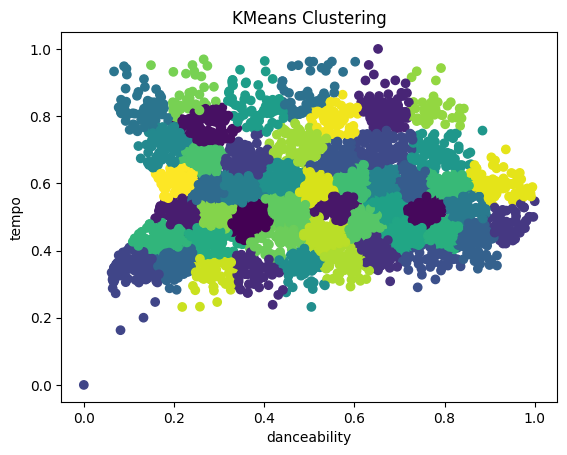

In [13]:
# rest of the columns:
'''
['name', 'artist', 'id', 'html', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', duration_ms]
'''
# good features (I think?)
# feature_1 = "danceability"
# feature_2 = "tempo"

feature_1 = "danceability"
feature_2 = "tempo"

two_song_features = minmax_dropped_cols_df.loc[: , [feature_1, feature_2]].copy()
two_song_features

# 2. initialise the model
random_seed = 123

my_2d_kmeans = KMeans(n_clusters = 50, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed
                    )

# 3. fit the model to the data
my_2d_kmeans.fit(two_song_features)




# Plot the data points
plt.scatter(x = two_song_features.iloc[:, 0],
            y = two_song_features.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# # Annotate the data points
# for idx, row in two_song_features.iterrows():
#     plt.annotate(idx, (row[feature_1], row[feature_2]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_song_features.columns[0])
plt.ylabel(two_song_features.columns[1])

# Display the plot
plt.show()

In [14]:
### USE ELBOW METHOD

# Separate numeric and non-numeric columns
numeric_cols = minmax_dropped_cols_df.select_dtypes(include=['number']).columns
non_numeric_cols = minmax_dropped_cols_df.select_dtypes(exclude=['number']).columns

# Extract the numeric and non-numeric data
numeric_data = minmax_dropped_cols_df[numeric_cols]
non_numeric_data = minmax_dropped_cols_df[non_numeric_cols]


# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed
                      )

    # Fit the KMeans model to the scaled data
    myKMeans.fit(numeric_data)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

In [15]:
inertia_list

[3422.540406984435,
 2495.1919495231145,
 1844.2969825835667,
 1568.6693648236537,
 1485.6394029401808,
 1269.981429597023,
 1141.9580814902106,
 1075.1251384533805,
 1049.1707334892603,
 999.4535719346217,
 954.5914622012043,
 935.7245533895621,
 899.0713973027711,
 877.2713445156265,
 848.6457865582116,
 823.9976566582968,
 820.4251195443799,
 800.7891425039863,
 790.6498560159889,
 780.929950654535,
 745.0809816127722,
 732.9829382501465,
 724.1450315840365,
 714.2106157772254,
 705.3382345703528,
 699.3570180077501,
 689.4462065225829,
 684.3729457889726,
 676.6824385107674,
 669.6382074205818,
 665.7580739177845,
 658.8359277793874,
 654.5321012093307,
 651.214706782625,
 644.1644501259368,
 636.3876015410059,
 628.9385826064826,
 625.288318899591,
 625.7802973316248,
 620.7622041513322,
 616.8325147372321,
 613.9654639615037,
 603.9350625439421,
 599.69268007244,
 597.5867431400652,
 594.4462384769197,
 593.3921521813763,
 586.8386517144046,
 583.3552789442506,
 578.5284382921711

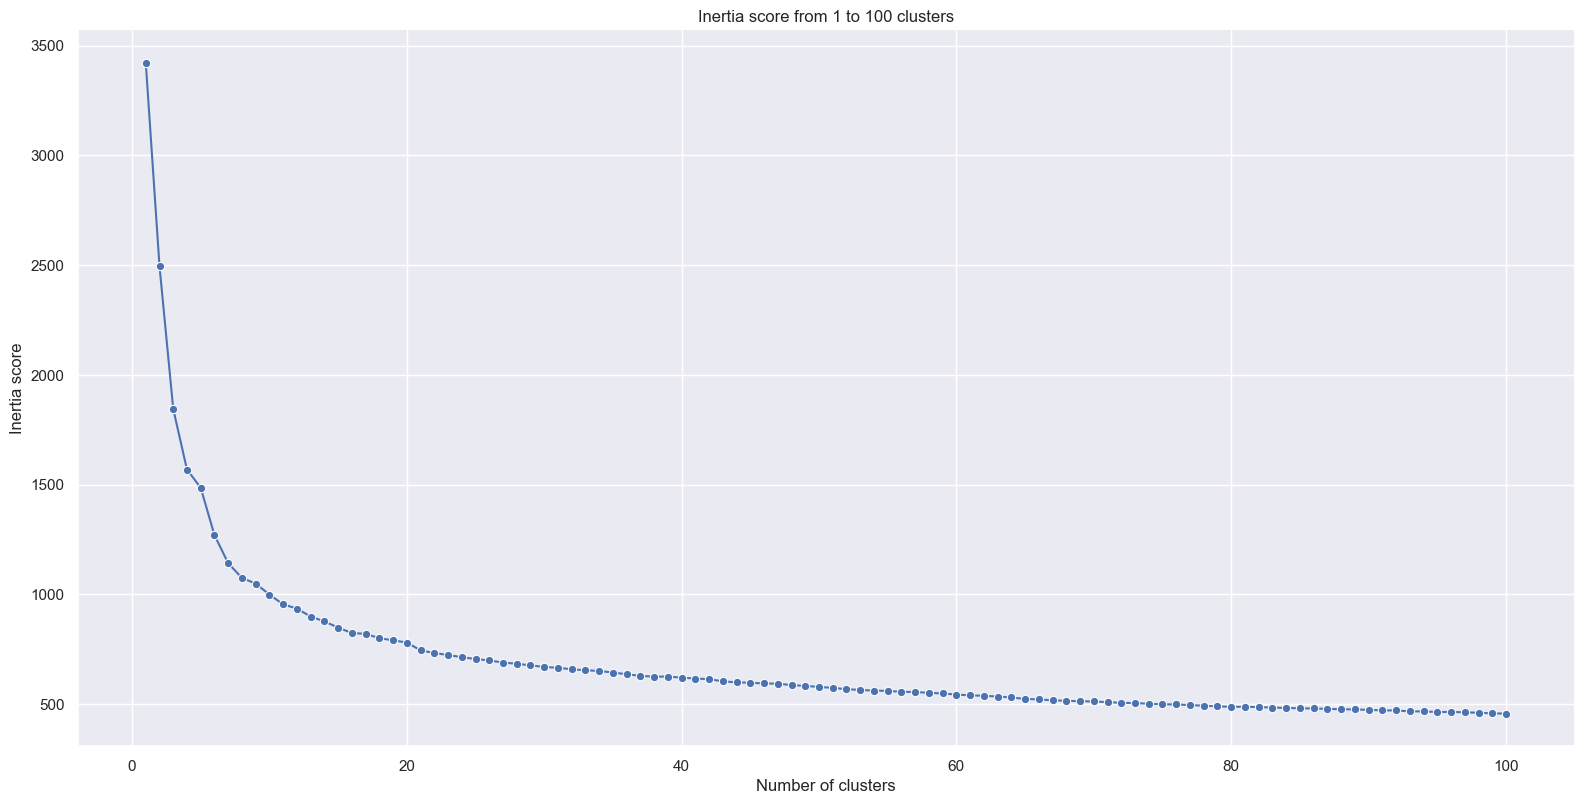

In [16]:
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [22]:
#### SILHOUETTE SCORE
# Set the maximum number of clusters to try
max_k = 100

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(2, max_k+1):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(numeric_data)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(numeric_data, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

In [23]:
sil_scores

[0.31341493474841514,
 0.3016726407804485,
 0.25698284553122497,
 0.23215018688415348,
 0.2487082248375698,
 0.2485595641631724,
 0.22942725437543285,
 0.21254428980542098,
 0.20858193427296226,
 0.19371885192474445,
 0.19550821022046266,
 0.1968602421382018,
 0.19802072707868415,
 0.19444715767818094,
 0.1983926130461586,
 0.17620983832601056,
 0.18972290095201003,
 0.18255068255658138,
 0.1705214218282782,
 0.168746558903388,
 0.16677503587052572,
 0.16678246789979873,
 0.16242648407220955,
 0.16134244597521874,
 0.1583019503247547,
 0.15919684300935427,
 0.15326847728674964,
 0.154607663000492,
 0.15301303965486004,
 0.15222014812702284,
 0.14890179844799134,
 0.14225219025097918,
 0.14291531239666636,
 0.14465497447976822,
 0.13233109053220832,
 0.1334254365664713,
 0.13165670996481169,
 0.1292605962888626,
 0.1287675900388164,
 0.12735194731013225,
 0.12842008456307263,
 0.1292983675934758,
 0.1253250280382809,
 0.12439490756631733,
 0.12456170171428117,
 0.12242205355475863,
 0.1

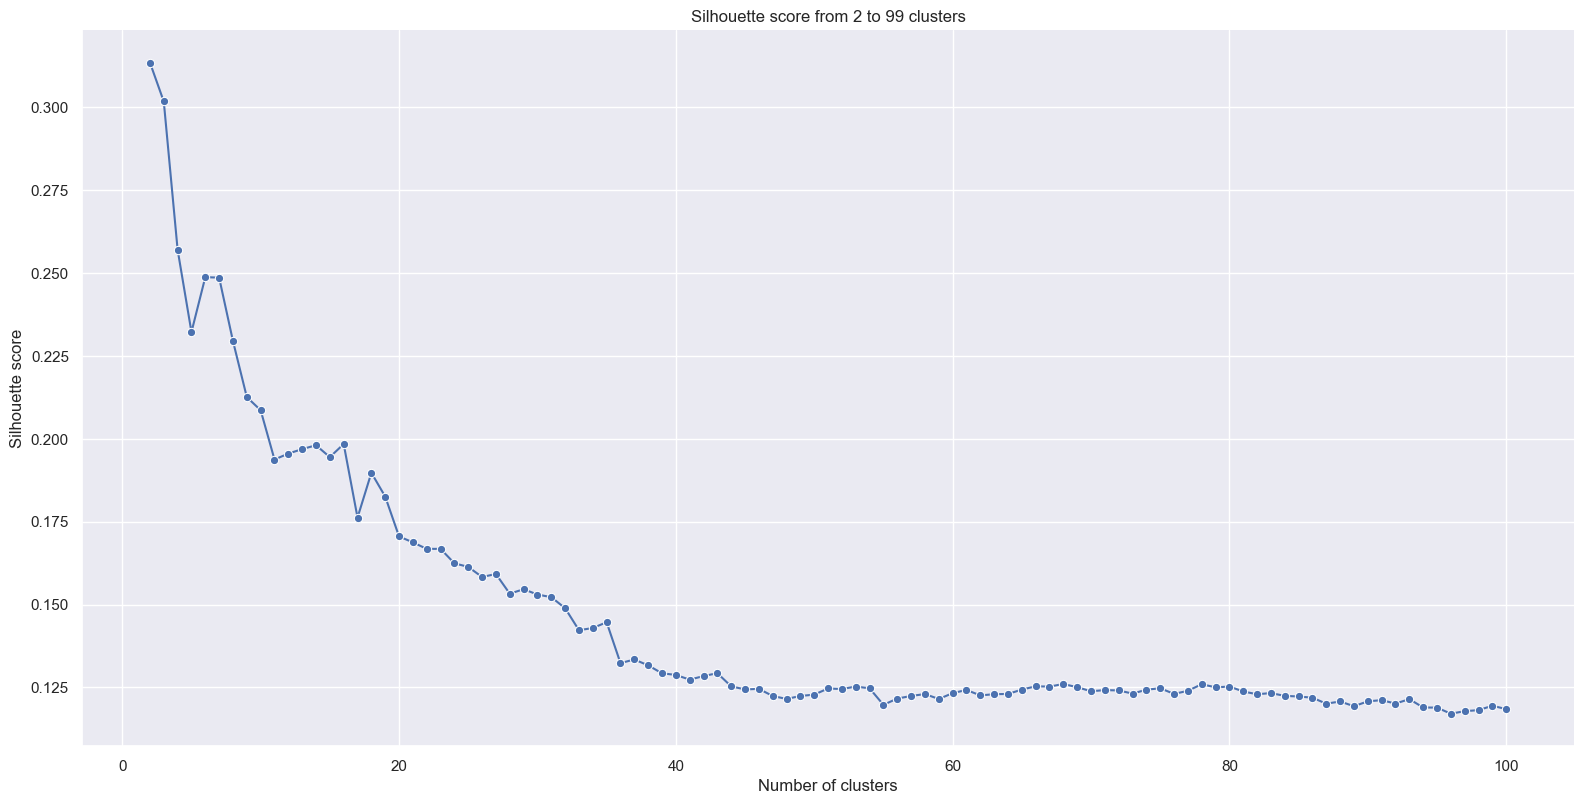

In [24]:
(
sns.relplot(y = sil_scores,
            x = range(2, max_k+1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

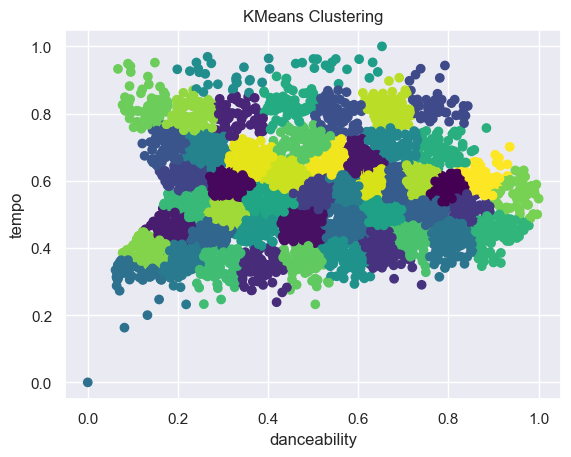

In [25]:
# rest of the columns:
'''
['name', 'artist', 'id', 'html', 'danceability', 'energy', 'key',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']
'''
# good features (I think?)
# feature_1 = "danceability"
# feature_2 = "tempo"


numeric_data_df = numeric_data.copy()


feature_1 = "danceability"
feature_2 = "tempo"
n_clusters = 50
random_seed = 1337


two_song_features = numeric_data_df.loc[: , [feature_1, feature_2]].copy()
two_song_features

# 2. initialise the model


my_2d_kmeans = KMeans(n_clusters = n_clusters, # we'll explore how to choose the number of clusters in a later notebook
                      random_state = random_seed
                    )

# 3. fit the model to the data
my_2d_kmeans.fit(two_song_features)




# Plot the data points
plt.scatter(x = two_song_features.iloc[:, 0],
            y = two_song_features.iloc[:, 1],
            c = my_2d_kmeans.labels_,
            cmap = 'viridis')

# # Annotate the data points
# for idx, row in two_song_features.iterrows():
#     plt.annotate(idx, (row[feature_1], row[feature_2]), xytext=(5, 0), textcoords='offset points')

# Add labels and title
plt.title('KMeans Clustering')
plt.xlabel(two_song_features.columns[0])
plt.ylabel(two_song_features.columns[1])

# Display the plot
plt.show()

In [26]:
# Initialise the model
my_kmeans = KMeans(n_clusters = n_clusters, # you always choose the number of k here
                   random_state = random_seed)

# Fit the model to the data
my_kmeans.fit(numeric_data_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
numeric_data_df["cluster"] = clusters
print(numeric_data_df["cluster"].value_counts())
print(numeric_data_df)

cluster
1     206
37    190
22    182
9     170
34    169
18    168
16    142
27    142
32    140
24    137
14    132
28    131
10    129
36    124
3     123
19    121
11    121
38    120
21    119
43    118
42    117
4     114
0     114
26    113
12    111
17    104
31    101
15    100
35     96
33     95
30     91
39     90
7      84
46     84
41     83
13     74
40     73
6      70
5      69
45     67
23     64
8      60
49     58
48     54
29     53
47     53
2      52
20     47
44     34
25     26
Name: count, dtype: int64
      danceability   energy       key  loudness  speechiness  acousticness  \
0         0.680455  0.25900  1.000000  0.763897     0.076797      0.696787   
1         0.767322  0.39900  0.181818  0.771967     0.037691      0.217871   
2         0.880041  0.73000  0.181818  0.798018     0.377996      0.454819   
3         0.729059  0.05020  0.363636  0.682811     0.051307      0.882530   
4         0.673216  0.11900  0.545455  0.655228     0.041394      0.919679  

In [27]:
print(numeric_data_df["cluster"].unique())

[25  0 35 19 41 44 39 13 48 33 34 20  7 11 36 15  1 46 43 32  5 27 21  8
 47 24 22 49 31  6 30  9 12 29 18 26  4 14 10 16 37 45 17 38 40 42 28  2
 23  3]


In [28]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

scaled_features_df = numeric_data_df.copy()

# State the label for each arm of the chart
categories = scaled_features_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[0]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[1]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[2]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[3]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[4]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[5]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[6]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[7]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[8]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[9]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

In [29]:
'''
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import itertools
import os

# Create directory if it doesn't exist
save_dir = r"D:\data_science_bootcamp\week_07\Moosic\all plots"
os.makedirs(save_dir, exist_ok=True)

# List of features
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 'valence', 
           'tempo', 'time_signature']

# List of n_clusters to try
cluster_sizes = [20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]

# Random seed for reproducibility
random_seed = 1337

# Generate all possible pairs of features
feature_pairs = list(itertools.combinations(features, 2))

# Loop through each feature pair and cluster size
for feature_1, feature_2 in feature_pairs:
    print(f"\nAnalyzing feature pair: {feature_1} vs {feature_2}")
    
    # Extract the features
    two_song_features = numeric_data_df.loc[:, [feature_1, feature_2]].copy()
    
    for n_clusters in cluster_sizes:
        print(f"Running with {n_clusters} clusters...")
        
        # Initialize and fit the model
        my_2d_kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
        my_2d_kmeans.fit(two_song_features)
        
        # Create a new figure for each combination
        plt.figure(figsize=(10, 8))
        
        # Plot the data points
        scatter = plt.scatter(
            x=two_song_features.iloc[:, 0],
            y=two_song_features.iloc[:, 1],
            c=my_2d_kmeans.labels_,
            cmap='viridis',
            alpha=0.7
        )
        
        # Add cluster centers
        plt.scatter(
            x=my_2d_kmeans.cluster_centers_[:, 0],
            y=my_2d_kmeans.cluster_centers_[:, 1],
            s=100,
            c='red',
            marker='X'
        )
        
        # Add labels and title
        title = f'KMeans Clustering: {feature_1} vs {feature_2} ({n_clusters} clusters)'
        plt.title(title)
        plt.xlabel(feature_1)
        plt.ylabel(feature_2)
        
        # Add colorbar
        plt.colorbar(scatter, label='Cluster')
        
        # Save the plot
        filename = f"{feature_1}_vs_{feature_2}_{n_clusters}_clusters.png"
        filepath = os.path.join(save_dir, filename)
        plt.tight_layout()
        plt.savefig(filepath, dpi=300)
        plt.close()  # Close the figure to free memory
        
        print(f"Saved plot to {filepath}")'
        '''

'\nimport matplotlib.pyplot as plt\nfrom sklearn.cluster import KMeans\nimport itertools\nimport os\n\n# Create directory if it doesn\'t exist\nsave_dir = r"D:\\data_science_bootcamp\\week_07\\Moosic\x07ll plots"\nos.makedirs(save_dir, exist_ok=True)\n\n# List of features\nfeatures = [\'danceability\', \'energy\', \'key\', \'loudness\', \'speechiness\', \n           \'acousticness\', \'instrumentalness\', \'liveness\', \'valence\', \n           \'tempo\', \'time_signature\']\n\n# List of n_clusters to try\ncluster_sizes = [20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]\n\n# Random seed for reproducibility\nrandom_seed = 1337\n\n# Generate all possible pairs of features\nfeature_pairs = list(itertools.combinations(features, 2))\n\n# Loop through each feature pair and cluster size\nfor feature_1, feature_2 in feature_pairs:\n    print(f"\nAnalyzing feature pair: {feature_1} vs {feature_2}")\n    \n    # Extract the features\n    two_song_features = numeric_data_df.loc[:, [feature_1, fe

In [39]:
numeric_data_df.columns
# non_numeric_data
# minmax_dropped_cols_df = non_numeric_data.join(scaled_features_df)

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'cluster', 'new_cluster'],
      dtype='object')

In [40]:
from sklearn.cluster import KMeans

# Step 1: Select features for clustering (EXCLUDE old 'cluster' column)
features_for_clustering = numeric_data_df.drop(columns=['cluster'], errors='ignore')

# Step 2: Run K-Means
n_clusters = 50  # Adjust this as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
numeric_data_df['new_cluster'] = kmeans.fit_predict(features_for_clustering)  # Assign new clusters

# Step 3: Merge with non-numeric data
final_df = non_numeric_data.copy()  # Start with song metadata
final_df['cluster'] = numeric_data_df['new_cluster']  # Add new cluster labels

# Step 4: Save the final dataset
final_df.to_csv("songs_with_clusters.csv", index=False)

# Step 5: Preview results
print(final_df.head())


                                                name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist                       id  \
0  Gilberto Gil                                      1n7JnwviZ7zf0LR1tcGFq7    
1  Antônio Carlos Jobim                              5QGM1U0eCYrQuwSJwTm5Zq    
2  Martinho Da Vila                                  0NLIFSZxPzQhCwnkn5PJYs    
3  Chico César                                       3mXqOdlLE1k67WsAxryPFs    
4  Kurt Elling                                       7bSzjzjTkWT2CkIPPdp0eA    

                                                html  cluster  
0  https://open.spotify.com/track/1n7JnwviZ7zf0LR...        4  
1  https://open.spotify.com/track/5QGM1U0eCYrQuwS...  

In [42]:
print(final_df['cluster'].value_counts())  # See how many songs per cluster



print(final_df.head())  # Should contain both song info + cluster column



cluster
29    206
24    190
9     182
25    175
19    170
1     169
10    168
2     142
14    142
39    140
22    137
26    132
18    131
27    129
20    124
28    121
16    121
15    120
34    119
48    118
21    117
13    114
0     114
23    113
43    111
37    104
8     101
44     96
38     95
35     91
6      90
30     84
3      84
31     83
5      74
32     73
11     70
33     69
40     67
42     64
7      60
17     58
49     55
36     54
45     53
47     53
46     47
41     45
12     34
4      26
Name: count, dtype: int64
                                                name  \
0  Se Eu Quiser Falar Com Deus                   ...   
1  Saudade De Bahia                              ...   
2  Canta Canta, Minha Gente                      ...   
3  Mulher Eu Sei                                 ...   
4  Rosa Morena                                   ...   

                                             artist                       id  \
0  Gilberto Gil                                  

In [ ]:
# Calculate the mean value of each feature per cluster
cluster_means = numeric_data_df.groupby('new_cluster').mean()

# Display the first few rows
print(cluster_means.head())


             danceability    energy       key  loudness  speechiness  \
new_cluster                                                            
0                0.748390  0.526939  0.147528  0.814037     0.068068   
1                0.816066  0.691817  0.506724  0.869800     0.113007   
2                0.788514  0.707465  0.090269  0.880347     0.150613   
3                0.577498  0.405286  0.121212  0.808439     0.055331   
4                0.518893  0.304738  0.692308  0.742886     0.071732   

             acousticness  instrumentalness  liveness   valence     tempo  \
new_cluster                                                                 
0                0.225264          0.015976  0.111018  0.824757  0.558006   
1                0.118939          0.007001  0.130755  0.785607  0.485873   
2                0.099906          0.011399  0.138757  0.570129  0.502709   
3                0.554874          0.036941  0.147407  0.349217  0.531999   
4                0.809816        

In [44]:
# Compute the standard deviation of each feature across clusters
feature_importance = cluster_means.std().sort_values(ascending=False)
feature_importance.drop("cluster", inplace=True)
# Display the most important features
print(feature_importance)


instrumentalness    0.369311
acousticness        0.349328
key                 0.301244
energy              0.264400
valence             0.253309
danceability        0.184464
liveness            0.155028
loudness            0.081104
tempo               0.066268
speechiness         0.028826
time_signature      0.025836
duration_ms         0.011689
dtype: float64


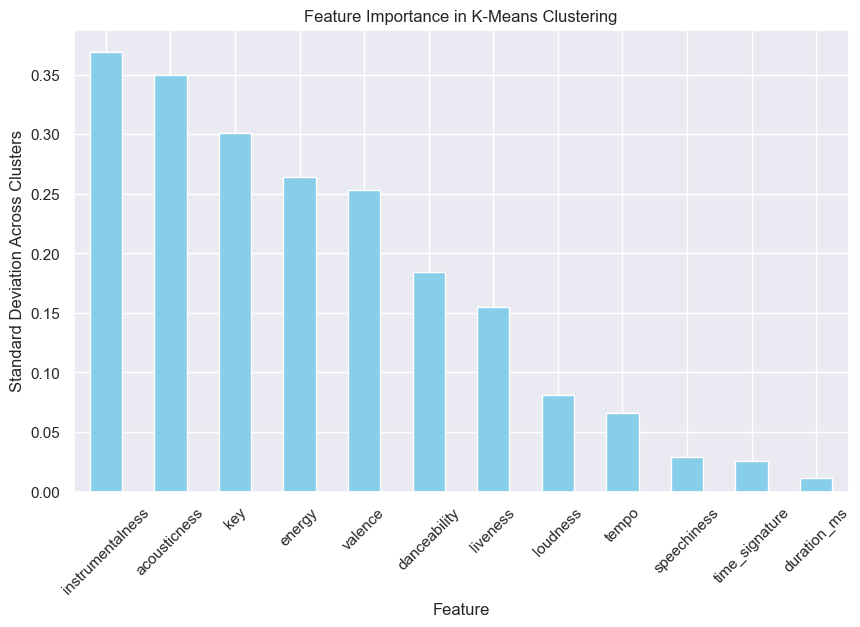

In [45]:
import matplotlib.pyplot as plt

# Plot feature importance (standard deviation across clusters)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in K-Means Clustering')
plt.xlabel('Feature')
plt.ylabel('Standard Deviation Across Clusters')
plt.xticks(rotation=45)
plt.show()


C:\Users\Ino\AppData\Local\Temp\ipykernel_23488\144845311.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



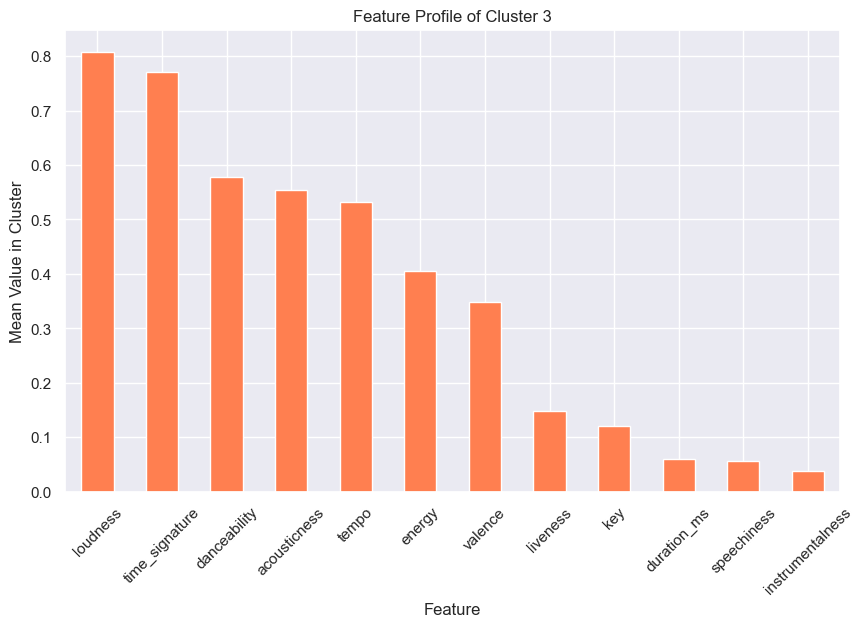

In [46]:
# Get the feature means for Cluster 3
cluster_3_profile = cluster_means.loc[3]


cluster_3_profile.drop('cluster', inplace=True)



# Sort features to see which ones stand out most
cluster_3_profile_sorted = cluster_3_profile.sort_values(ascending=False)


# Plot the feature profile for Cluster 3
plt.figure(figsize=(10, 6))
cluster_3_profile_sorted.plot(kind='bar', color='coral')
plt.title('Feature Profile of Cluster 3')
plt.xlabel('Feature')
plt.ylabel('Mean Value in Cluster')
plt.xticks(rotation=45)
plt.show()


In [47]:
cluster_means.drop(columns='cluster', inplace=True)
cluster_means

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
new_cluster,,,,,,,,,,,,
0,0.748390,0.526939,0.147528,0.814037,0.068068,0.225264,0.015976,0.111018,0.824757,0.558006,0.049175,0.798246
1,0.816066,0.691817,0.506724,0.869800,0.113007,0.118939,0.007001,0.130755,0.785607,0.485873,0.051134,0.797633
2,0.788514,0.707465,0.090269,0.880347,0.150613,0.099906,0.011399,0.138757,0.570129,0.502709,0.050165,0.800000
3,0.577498,0.405286,0.121212,0.808439,0.055331,0.554874,0.036941,0.147407,0.349217,0.531999,0.060459,0.771429
4,0.518893,0.304738,0.692308,0.742886,0.071732,0.809816,0.072934,0.767477,0.374951,0.480786,0.053939,0.800000
5,0.582129,0.715095,0.121622,0.876365,0.102869,0.485632,0.021567,0.136740,0.565427,0.617431,0.046377,0.791892
6,0.748110,0.756289,0.862626,0.876268,0.107470,0.413063,0.007960,0.150401,0.809791,0.567302,0.049127,0.800000
7,0.690572,0.790483,0.750000,0.879678,0.151609,0.163353,0.000506,0.666599,0.649272,0.552489,0.052605,0.803333
8,0.619861,0.577376,0.163816,0.863989,0.079922,0.107236,0.010201,0.158456,0.248845,0.586264,0.055927,0.790099


In [48]:
import os
filepath = r"D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters"

# Create the directory if it doesn't exist
os.makedirs(filepath, exist_ok=True)

# Loop through all clusters and generate a bar plot for each
for cluster_id in cluster_means.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'Feature Profile of Cluster {cluster_id}')
    plt.xlabel('Feature')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Create a unique filename for each cluster
    filename = os.path.join(filepath, f"cluster_{cluster_id}_features.png")
    
    plt.tight_layout()  # Ensures labels fit within the figure
    plt.savefig(filename, dpi=300)
    plt.close()  # Close the figure to free memory
    
    print(f"Saved feature profile for Cluster {cluster_id} to {filename}")

Saved feature profile for Cluster 0 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_0_features.png
Saved feature profile for Cluster 1 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_1_features.png
Saved feature profile for Cluster 2 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_2_features.png
Saved feature profile for Cluster 3 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_3_features.png
Saved feature profile for Cluster 4 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_4_features.png
Saved feature profile for Cluster 5 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_5_features.png
Saved feature profile for Cluster 6 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters\cluster_6_features.png
Saved feature profile for Cluster 7 to D:\data_science_bootcamp\week_07\Moosic\feature_imp

In [49]:
filepath = r"D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance"

# Create the directory if it doesn't exist
os.makedirs(filepath, exist_ok=True)

# First, sort your clusters based on danceability and then energy
# Assuming cluster_means is already a DataFrame with clusters as rows and features as columns
sorted_clusters = cluster_means.sort_values(by=['danceability', 'energy'], ascending=False)

# Now loop through the sorted clusters
for cluster_id in sorted_clusters.index:
    plt.figure(figsize=(10, 6))
    cluster_means.loc[cluster_id].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'Feature Profile of Cluster {cluster_id} (Danceability: {cluster_means.loc[cluster_id, "danceability"]:.2f}, Energy: {cluster_means.loc[cluster_id, "energy"]:.2f})')
    plt.xlabel('Feature')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
    # Create a unique filename for each cluster
    filename = os.path.join(filepath, f"cluster_{cluster_id}_features.png")
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()
    
    print(f"Saved feature profile for Cluster {cluster_id} to {filename}")

Saved feature profile for Cluster 1 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_1_features.png
Saved feature profile for Cluster 2 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_2_features.png
Saved feature profile for Cluster 24 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_24_features.png
Saved feature profile for Cluster 9 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_9_features.png
Saved feature profile for Cluster 34 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_34_features.png
Saved feature profile for Cluster 0 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_0_features.png
Saved feature profile for Cluster 6 to D:\data_science_bootcamp\week_07\Moosic\feature_importance_clusters_dance\cluster_6_features.png
Saved feature profile for Cluster 44 to D:\d

In [51]:
sorted_clusters

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
new_cluster,,,,,,,,,,,,
1,0.816066,0.691817,0.506724,0.869800,0.113007,0.118939,0.007001,0.130755,0.785607,0.485873,0.051134,0.797633
2,0.788514,0.707465,0.090269,0.880347,0.150613,0.099906,0.011399,0.138757,0.570129,0.502709,0.050165,0.800000
24,0.767365,0.796763,0.877990,0.889709,0.108067,0.070212,0.010387,0.151864,0.789602,0.556252,0.048587,0.801053
9,0.762873,0.807110,0.082418,0.887058,0.098164,0.140733,0.004580,0.167954,0.852251,0.558479,0.049585,0.798901
34,0.751410,0.499310,0.793736,0.821184,0.097349,0.178533,0.022081,0.138951,0.742030,0.494889,0.049413,0.798319
0,0.748390,0.526939,0.147528,0.814037,0.068068,0.225264,0.015976,0.111018,0.824757,0.558006,0.049175,0.798246
6,0.748110,0.756289,0.862626,0.876268,0.107470,0.413063,0.007960,0.150401,0.809791,0.567302,0.049127,0.800000
44,0.703314,0.678948,0.410985,0.851912,0.087973,0.587548,0.007480,0.177039,0.861707,0.573592,0.042801,0.802083
22,0.698307,0.837745,0.512276,0.887878,0.101453,0.100214,0.015444,0.190152,0.835259,0.637186,0.049869,0.801460


In [52]:
numeric_data_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,new_cluster
0,0.680455,0.25900,1.000000,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,25,4
1,0.767322,0.39900,0.181818,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,0,0
2,0.880041,0.73000,0.181818,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,35,44
3,0.729059,0.05020,0.363636,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,19,28
4,0.673216,0.11900,0.545455,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,19,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,0.272727,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,27,14
5231,0.194416,0.10100,0.545455,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,5,33
5232,0.061634,0.00093,0.818182,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,12,43
5233,0.137539,0.02080,0.363636,0.498142,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,0.074424,0.8,27,14


In [53]:

final_df




,name,artist,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,4
1,Saudade De Bahia ...,Antônio Carlos Jobim,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,0
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,44
3,Mulher Eu Sei ...,Chico César,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,28
4,Rosa Morena ...,Kurt Elling,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,28
...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,14
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,33
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,43
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...,14


In [56]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

scaled_features_df = numeric_data_df.copy()

# State the label for each arm of the chart
categories = scaled_features_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[0]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[1]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[2]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[3]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[4]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[5]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[6]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[7]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[8]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[9]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[10]].mean(),
                  scaled_features_df.loc[scaled_features_df["cluster"] == cluster, scaled_features_df.columns[11]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean preferences by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True,
  paper_bgcolor='#000000',
  plot_bgcolor='#000000',
  font=dict(color='#00cf61')
)

# Show the initialised plot and the trace objects
fig.show()